**This notebook is about preparing the data: <u>Analysis (EDA) and Cleaning</u>. It will first go about exploring and describing every feature alone. We will look for correlation and relationships between the features in the second part.**

<u>*EDA and data cleaning are two seperate processes.*</u>

"*there are different approaches to EDA, so it's going to be hard to know what analysis to perform and how to do it properly."*<br>
"*..there are an overwhelming number of methods to use in EDA.*"

#### EDA's purpose is to give an understanding of: 
- **Properties of the data** (*statistical properties, schema...*)<br>
- **Quality of the data:**
    - Missing Values. 
    - Inconsistent data types. <br>
- **Predictive power of the data:**
    - Correlation of features against the target. 







### 1) Descriptive analysis (Univariate Analysis) 
 - Provides an understanding of each attribute/variate of the dataset. <br>
 - Offers evidence for feature preprocessing and selection for later stages. 

There are three common types of attributes: **Numerical, Categorical, Textual**(?). 


| Attribute type | Analysis/calculation | Details |
| :- | :-: | :- |
| ***Common*** |<br> *Data Type* <br> <br>*Missing values*<br><br> | <br> Attribute's data type<br><br>Percentage of missing values<br><br>
| ***Numerical*** |<br> *Quantile statistics* <br><br>*Descriptive statistics*<br><br>*Distribution histogram*<br><br> | Q1, Q2, Q3, min, max, range, interquantile range<br><br>Mean, mode, standard deviation, median absolute deviation, kurtosis, skewness.<br><br> based on appropriate number of bins
| ***Categorical*** |<br> *Cardinality* <br> <br>*Unique counts*<br><br> | <br> Number of unique values for the  categorical attribute<br><br>Number of occurrences for each unique value of the cateforical attribute<br><br>
| ***Textual*** |<br> *Tokens* <br> <br>*DF/TF*<br><br> | <br> Number of unique tokens<br><br>Distribution of document frequency and term frequency with/without standard english stop words<br><br>


### 2) Correlation analysis (Bivariate Analysis)
Examines the <u>*relationship between two attributes*</u>, whether they are correlated or not. This analysis is done from two perspectives: 
- **Qualitative:** <br><br> Descriptive analysis of dependent attributes (num/cat) against each unique value of THE independent categorical attribute(?) *(dependent att are num or cat? THE independent categorical attribute?)* <br><br>
    This perspective helps understand ***intuitively*** the relationship between X and Y.<br><br>
    Visualizations are used together with quanlitative analysis to help understand. 
    
| Attribute type | Analysis |
| :- | :- | 
| *Both Categorical (X,Y)* | Contingence table with unique counts of X(Y) per unique value of Y(X)|
| *Categorical (X) <br>versus numerical (Y)* |Descriptive statistics or histogram of Y per unique value of X|

- **Quantitative:** <br><br>
 Test of the relationship between X and Y based on <u>*hypothesis testing framework.*</u> <br><br>
 Provides a mathematical methodology to quantitatively determine the existence and/or the strength of the relationship. 
 

|X/Y | Categorical | Numerical |
| :-: | :-: | :-: |
|**Categorical**| Chi-square test <br><br> Information gain | <br><br>Student T-test <br><br> ANOVA<br><br> Logistic regression<br><br>Discretize Y *(left column)*<br><br>|
|**Numerical**|<br><br>Student T-test <br><br> ANOVA<br><br> Logistic regression<br><br>Discretize X *(right column)*<br><br> | <br><br>Correlation <br><br> Linear regression <br><br> Discretize Y *(left column)*<br><br>Discretize X *(right column)*<br><br>|

# Exploratory Data Analysis

In [122]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib notebook
import numpy as np
import seaborn as sns
df = pd.read_csv("C:/Users/elkha/Desktop/clinvar_conflicting.csv")

C:\Users\elkha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,38,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

In [125]:
df.head(5)

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0


### Plot I: Missing Values

<IPython.core.display.Javascript object>


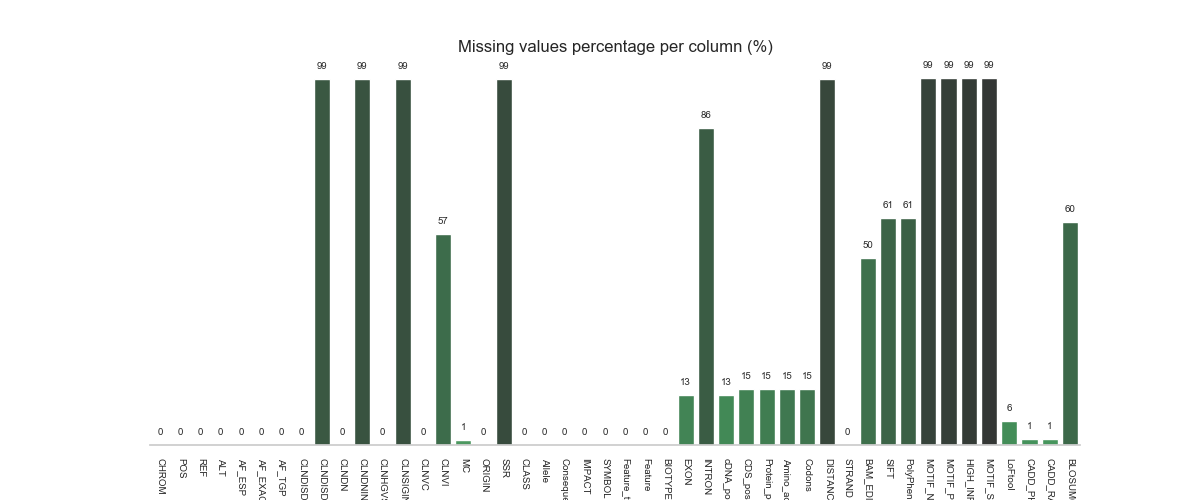

In [129]:
a=df.isnull().sum()*100/65188
#this code could be better!
sns.set(style='whitegrid',color_codes=True)
pal = sns.color_palette("Greens_d", len(a.index))

f, ax = plt.subplots(figsize=(12, 5))
rank = a.argsort().argsort() 
ax = sns.barplot(x=a.index, y=a,  palette=np.array(pal[::-1])[rank])
ax.grid(False)

for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                   ( p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                    fontsize=7)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

Xaxis = plt.gca().xaxis
for item in Xaxis.get_ticklabels():
    item.set_rotation(270)
    
sns.despine()
sns.despine(left=True)
ax.set(yticks=[])

my_text=ax.set_title('Missing values percentage per column (%)')

##### Action I: Dropping columns with >= 80% of missing values

In [130]:
to_drop=list(a[(a >= 80)].index)
df.drop(to_drop,axis = 1,inplace = True)

### Plot II: Datatypes 

In [131]:
a=df.dtypes.unique()
b=[]
for i in range(len(a)): 
    select_indices = list(np.where(df.dtypes == a[i])[0])
    select_indices = df.dtypes.iloc[select_indices].index.tolist()
    b.append([a[i],len(select_indices)])
    #print(select_indices)
    
dtypes=pd.DataFrame(b,columns=["Types","Total Attributes"])

<IPython.core.display.Javascript object>


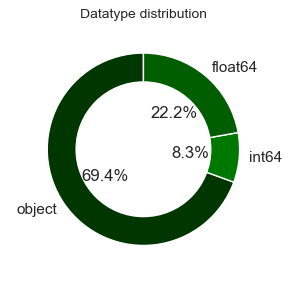

C:\Users\elkha\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing arguments to show(), other than passing 'block' by keyword, is deprecated 3.1, and support for it will be removed in 3.3.
  from ipykernel import kernelapp as app


In [132]:
# Pie chart
labels = dtypes["Types"].astype(str).to_list()
total = dtypes["Total Attributes"].to_list()
colors = ['#003700','#007800','#005e00']
 
fig1, ax1 = plt.subplots()

ax1.pie(total, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.49)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.set_size_inches(3,3) 
fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show(cmap=cmap)
my_text=ax1.set_title("Datatype distribution", fontsize=10, pad=0)

##### The dominant datatype in this dataset is Object.

### Plot III: Distribution of the Target

<IPython.core.display.Javascript object>


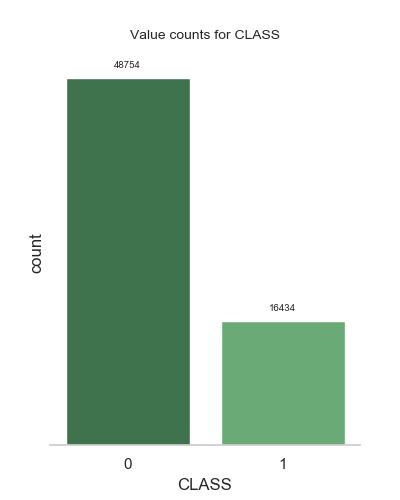

In [126]:
f3, ax3 = plt.subplots(figsize=(4,5))
ax3 = sns.countplot(x="CLASS", data=df, palette='Greens_d')

ax3.grid(False)

for p in ax3.patches:
    ax3.annotate(int(p.get_height()), 
                   ( p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                    fontsize=7)
sns.despine()
sns.despine(left=True)
ax3.set(yticks=[])

my_text=ax3.set_title('Value counts for CLASS',fontsize=10, pad=15)

##### The target column is skewed to class 0. This entails the need to sampling techniques to balance the data. 

### Plot IV: Pairplot

In [156]:
df["CLASS"]= df["CLASS"].astype('str')

<IPython.core.display.Javascript object>


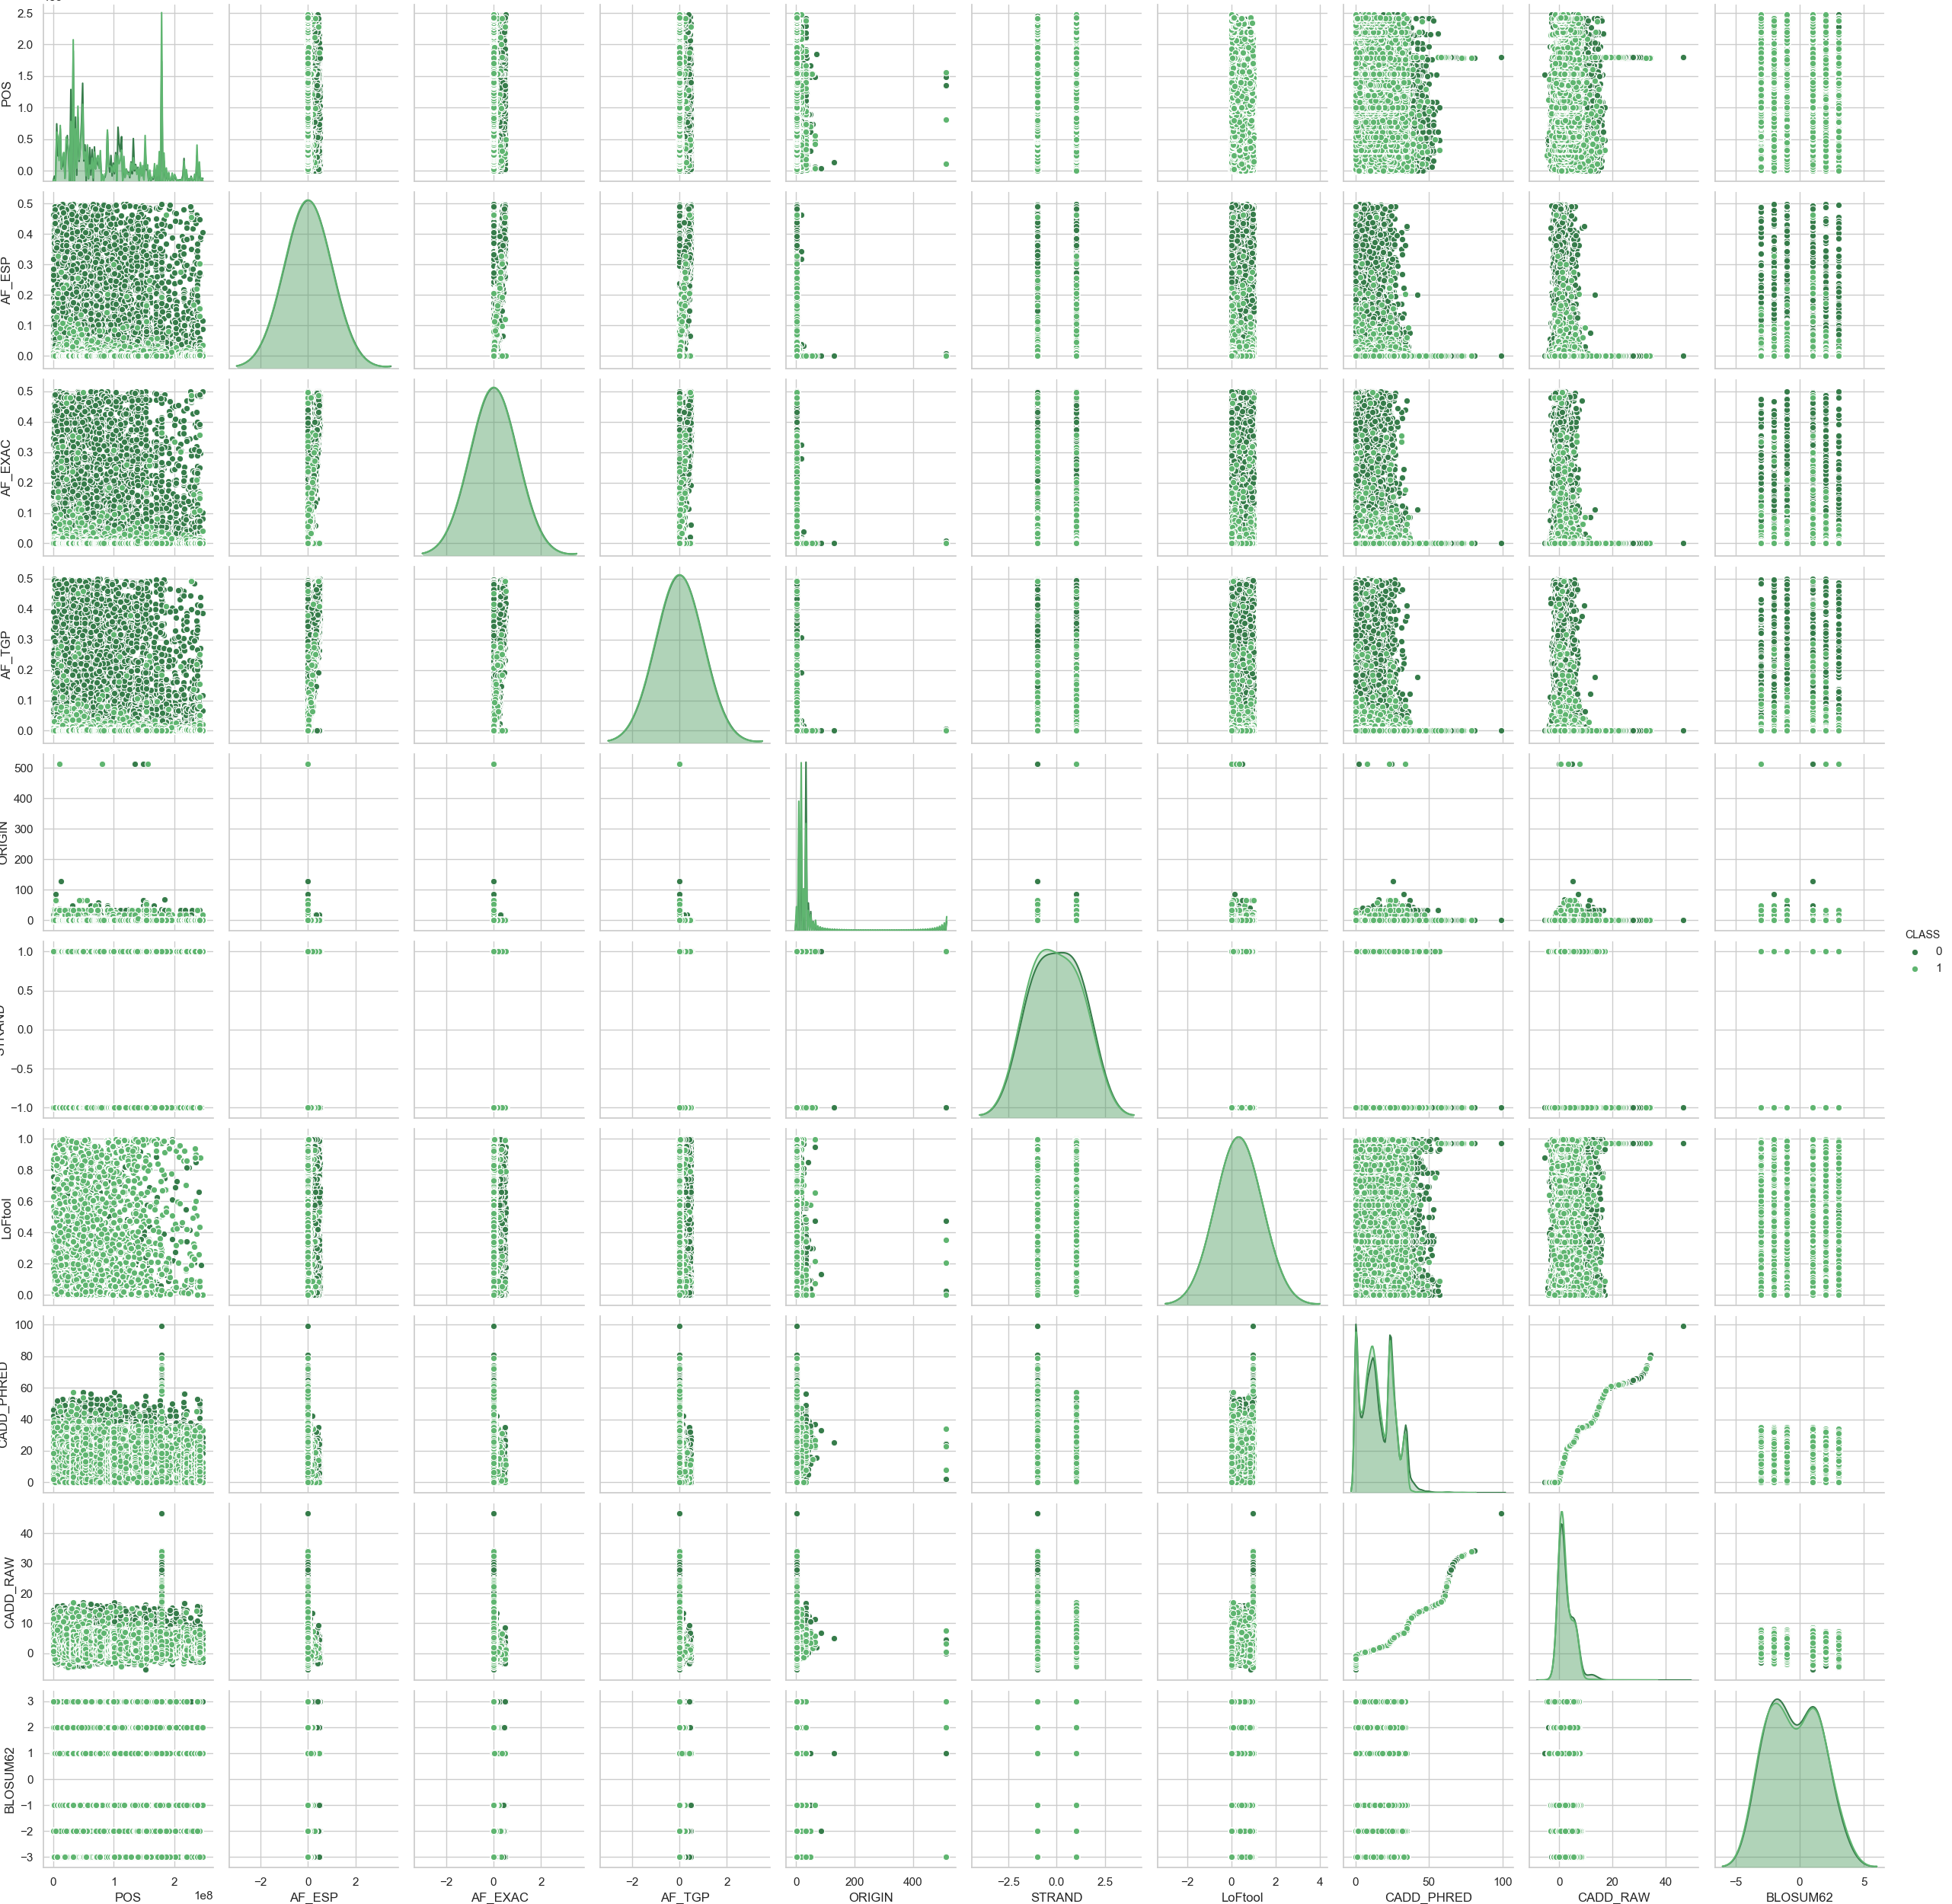

In [164]:
ax4 = sns.pairplot(df, palette="Greens_d",hue="CLASS", diag_kws={'bw': 1} )

### Plot V: Heatmap

#### Crosstab for Feature and SYMBOL
*When I previously established univariate analysis; going through each feature alone. I noticed that the most frequent values in Feature and SYMBOL have the equal frequencies. I figured that cross tabulation might help me show the overlapping between Feature and SYMBOL.*

In [58]:
cross=pd.crosstab(df.SYMBOL, df.Feature)
a=df["SYMBOL"].value_counts()[:25].index[0:25]
b=df["Feature"].value_counts()[:25].index[0:25]
cross=cross[b]
a=a.tolist()
cross_20=cross.loc[a]

<IPython.core.display.Javascript object>


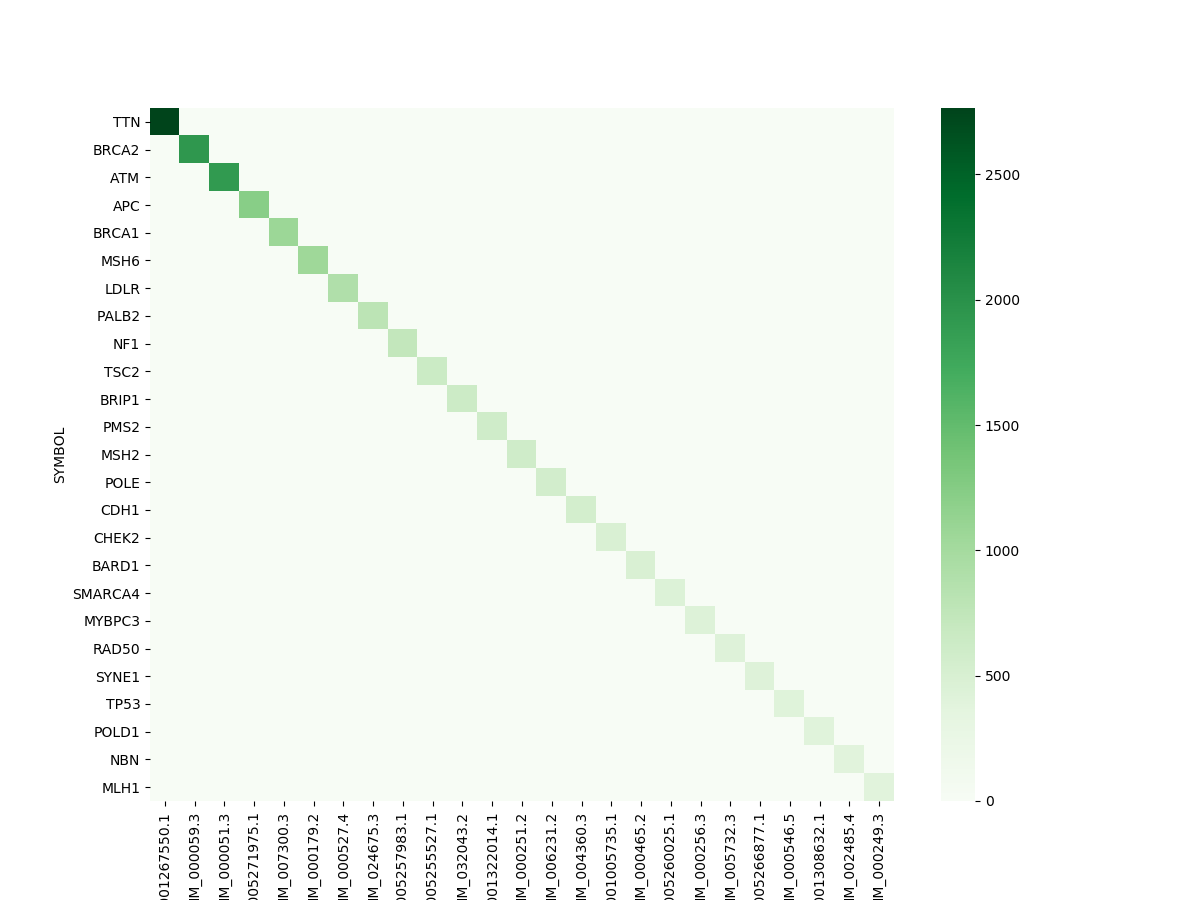

In [87]:
f, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(cross_20,
            cmap="Greens", annot=False, cbar=True)

##### references
- https://cloud.google.com/blog/products/ai-machine-learning/building-ml-models-with-eda-feature-selection
- https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166